## Part One: Data Exploration
Here we will explore the data to gain an understanding of the range of values and typical values for each feature. We will also look at the correlation between features, specifically popularity and the other features, to get an understanding of what factors might have the greatest influence in our models.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [76]:
df = pd.read_csv("songs.csv", index_col = 0)

In [77]:
df.head()
y_true = df['artist'].to_numpy()

In [78]:
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Rich Flex,Her Loss,drake,2022-11-04,239360,88,0.561,0.05030,0.520,0.000002,0.3550,-9.342,0.2440,0.424,153.150
1,Major Distribution,Her Loss,drake,2022-11-04,170502,87,0.908,0.01270,0.546,0.000000,0.0707,-10.491,0.3230,0.225,131.016
2,On BS,Her Loss,drake,2022-11-04,261544,86,0.841,0.02010,0.358,0.000000,0.3900,-8.368,0.5910,0.329,158.014
3,BackOutsideBoyz,Her Loss,drake,2022-11-04,152962,84,0.849,0.04070,0.433,0.000000,0.3880,-8.434,0.3160,0.395,142.110
4,Privileged Rappers,Her Loss,drake,2022-11-04,160821,84,0.934,0.00274,0.614,0.000000,0.1230,-7.384,0.1980,0.616,144.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Mr. Perfectly Fine (Taylor’s Version) (From Th...,Fearless (Taylor's Version),Taylor Swift,2021-04-09,277591,74,0.660,0.16200,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942
468,We Were Happy (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),Taylor Swift,2021-04-09,244236,65,0.609,0.84900,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007
469,That’s When (feat. Keith Urban) (Taylor’s Vers...,Fearless (Taylor's Version),Taylor Swift,2021-04-09,189495,67,0.588,0.22500,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201
470,Don’t You (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),Taylor Swift,2021-04-09,208608,66,0.563,0.51400,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934


In [79]:
df['artist'] = df['artist'].replace({'drake': 'Drake', 'theweeknd': 'The Weeknd', 'edsheeran': 'Ed Sheeran', 'badbunny': 'Bad Bunny'})

Text(0, 0.5, 'Frequency')

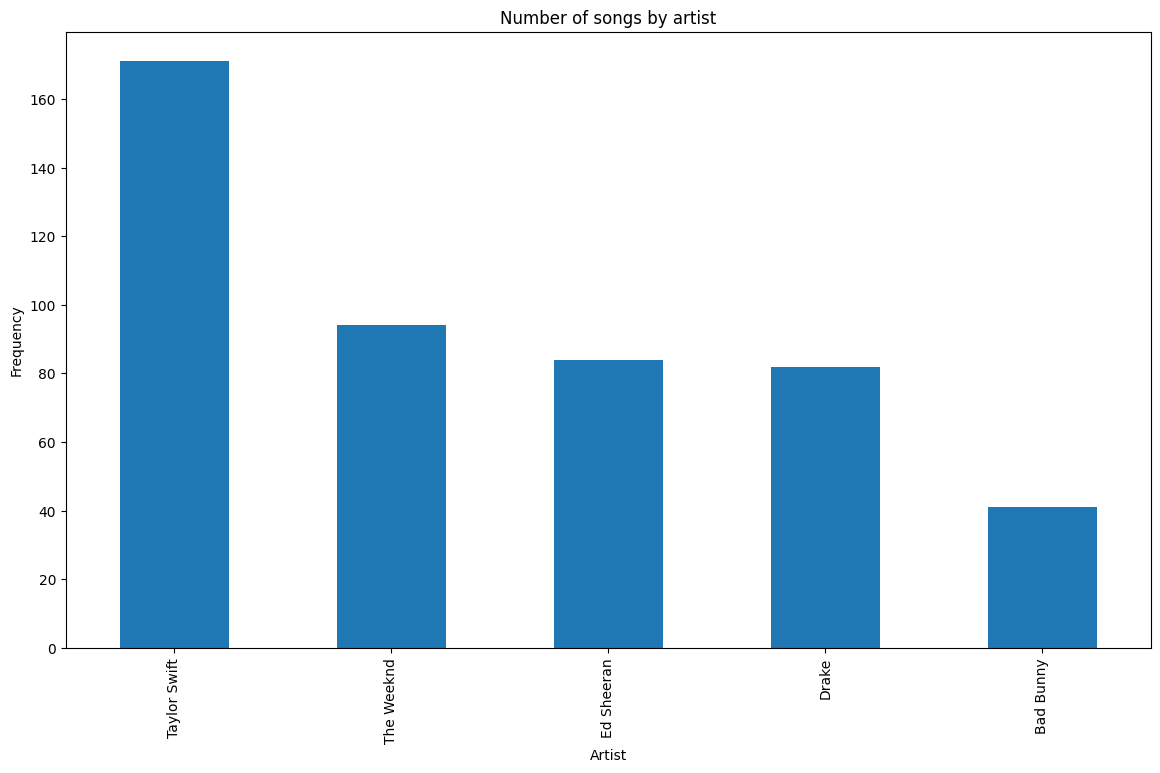

In [80]:
ax = df['artist'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of songs by artist")
ax.set_xlabel("Artist")
ax.set_ylabel("Frequency")

Text(0.5, 0.98, 'Popularity distribution of each artist')

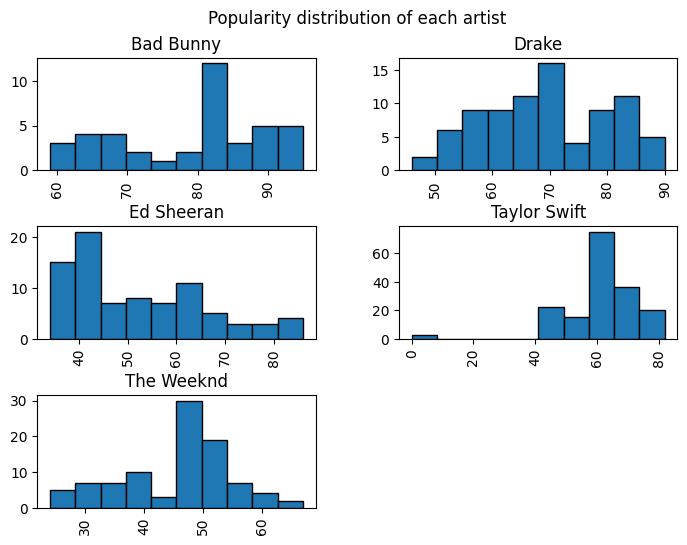

In [81]:
import pylab as pl
df['popularity'].hist(by=df['artist'], edgecolor='black', figsize = (8,6))
pl.suptitle("Popularity distribution of each artist")

In [82]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,472.0,224094.608051,49207.747575,36935.000000,195746.500000,220839.500000,247071.000000,403887.000
popularity,472.0,59.495763,15.204200,0.000000,49.000000,61.000000,68.250000,95.000
danceability,472.0,0.624655,0.144392,0.193000,0.530000,0.627000,0.736000,0.956
acousticness,472.0,0.287461,0.292826,0.000191,0.038100,0.170000,0.489000,0.971
energy,472.0,0.600154,0.177338,0.021800,0.482000,0.618000,0.739500,0.959
instrumentalness,472.0,0.007419,0.054021,0.000000,0.000000,0.000002,0.000078,0.880
liveness,472.0,0.173761,0.127254,0.033500,0.096425,0.122000,0.196000,0.783
loudness,472.0,-7.141326,2.736630,-31.160000,-8.522500,-6.702000,-5.371000,-2.098
speechiness,472.0,0.099857,0.111269,0.023100,0.035150,0.053250,0.113000,0.912
valence,472.0,0.440930,0.224415,0.036100,0.253500,0.429500,0.596250,0.961


In [83]:
df.loc[df['popularity'] == 0]

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
376,I Know Places - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,216333,0,0.592,0.829,0.128,0.0,0.527,-17.932,0.589,0.150,78.828
377,I Wish You Would - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,107133,0,0.781,0.717,0.357,0.0,0.185,-16.394,0.912,0.645,118.317
378,Blank Space - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,131186,0,0.675,0.801,0.234,0.0,0.657,-15.064,0.721,0.578,127.296


In [84]:
len(df.loc[df['instrumentalness'] == 0])

223

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 471
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              472 non-null    object 
 1   album             472 non-null    object 
 2   artist            472 non-null    object 
 3   release_date      472 non-null    object 
 4   length            472 non-null    int64  
 5   popularity        472 non-null    int64  
 6   danceability      472 non-null    float64
 7   acousticness      472 non-null    float64
 8   energy            472 non-null    float64
 9   instrumentalness  472 non-null    float64
 10  liveness          472 non-null    float64
 11  loudness          472 non-null    float64
 12  speechiness       472 non-null    float64
 13  valence           472 non-null    float64
 14  tempo             472 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 59.0+ KB


In [86]:
corr_matrix = df.corr()
corr_matrix

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
length,1.000000,0.165329,-0.121437,-0.004046,-0.037827,-0.128277,-0.094777,0.018626,-0.080696,-0.245624,0.033103
popularity,0.165329,1.000000,0.205052,-0.074613,-0.057812,-0.040909,-0.093553,-0.006231,0.021714,-0.051833,0.032384
danceability,-0.121437,0.205052,1.000000,-0.272682,0.121114,-0.128301,-0.013851,0.146566,0.140866,0.413127,-0.158805
acousticness,-0.004046,-0.074613,-0.272682,1.000000,-0.642863,0.106958,-0.059410,-0.540681,0.001725,-0.189854,-0.109459
energy,-0.037827,-0.057812,0.121114,-0.642863,1.000000,-0.101871,0.096246,0.732812,0.027539,0.434424,0.139709
instrumentalness,-0.128277,-0.040909,-0.128301,0.106958,-0.101871,1.000000,-0.054967,-0.346486,-0.061296,-0.092228,0.009985
liveness,-0.094777,-0.093553,-0.013851,-0.059410,0.096246,-0.054967,1.000000,0.108741,0.137428,-0.008801,-0.018385
loudness,0.018626,-0.006231,0.146566,-0.540681,0.732812,-0.346486,0.108741,1.000000,-0.082416,0.339873,0.074945
speechiness,-0.080696,0.021714,0.140866,0.001725,0.027539,-0.061296,0.137428,-0.082416,1.000000,0.079254,0.024778
valence,-0.245624,-0.051833,0.413127,-0.189854,0.434424,-0.092228,-0.008801,0.339873,0.079254,1.000000,-0.048789


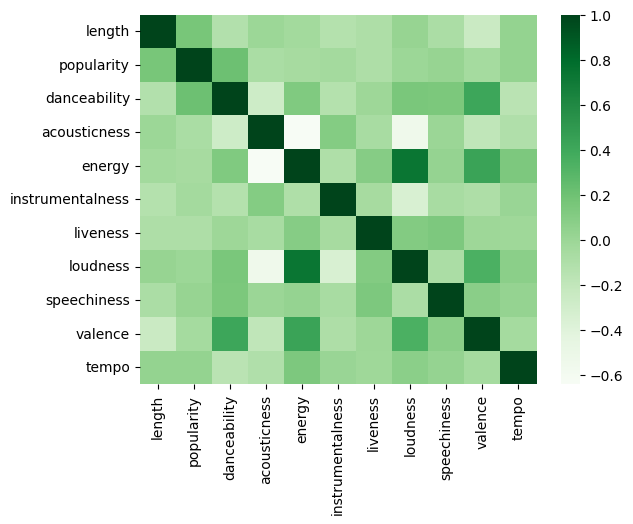

In [87]:
sn.heatmap(corr_matrix, annot=False, cmap="Greens")
plt.show()

## Research Question 1: How can we build a model to predict the popularity of a song on Spotify, given the song’s audio and other features?

## Data Cleaning

In [88]:
import numpy as np
from sklearn import tree  # Using sklearn Decision Tree classifier
from sklearn import ensemble  # Using sklearn Random Forest classifier
from sklearn.model_selection import train_test_split  # Using train_test_split to generate training and test data
np.random.seed(42)

In [89]:
artists=pd.get_dummies(df['artist'])

In [90]:
df_dropped = df.drop(columns = ['name','album','artist','release_date'])
# Join with dummy variable for each artist
df_artists = df_dropped.join(artists)
df_artists

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,Bad Bunny,Drake,Ed Sheeran,Taylor Swift,The Weeknd
0,239360,88,0.561,0.05030,0.520,0.000002,0.3550,-9.342,0.2440,0.424,153.150,0,1,0,0,0
1,170502,87,0.908,0.01270,0.546,0.000000,0.0707,-10.491,0.3230,0.225,131.016,0,1,0,0,0
2,261544,86,0.841,0.02010,0.358,0.000000,0.3900,-8.368,0.5910,0.329,158.014,0,1,0,0,0
3,152962,84,0.849,0.04070,0.433,0.000000,0.3880,-8.434,0.3160,0.395,142.110,0,1,0,0,0
4,160821,84,0.934,0.00274,0.614,0.000000,0.1230,-7.384,0.1980,0.616,144.045,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,277591,74,0.660,0.16200,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942,0,0,0,1,0
468,244236,65,0.609,0.84900,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007,0,0,0,1,0
469,189495,67,0.588,0.22500,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201,0,0,0,1,0
470,208608,66,0.563,0.51400,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934,0,0,0,1,0


### Upsampling minority classes

In [91]:
from sklearn.utils import resample
#set the minority class to a seperate dataframe
df_taylor = df_artists[df_artists['Taylor Swift']==1]
df_ed = df_artists[df_artists['Ed Sheeran']==1]
df_drake = df_artists[df_artists['Drake']==1]
df_weeknd = df_artists[df_artists['The Weeknd']==1]
df_badbunny = df_artists[df_artists['Bad Bunny']==1]

#upsample the minority class
df_ed_upsampled = resample(df_ed,random_state=42, n_samples = 171, replace=True)
df_drake_upsampled = resample(df_drake,random_state=42, n_samples = 171, replace=True)
df_weeknd_upsampled = resample(df_weeknd,random_state=42, n_samples = 171, replace=True)
df_badbunny_upsampled = resample(df_badbunny,random_state=42, n_samples = 171, replace=True)

#concatenate the upsampled dataframe
df_upsampled = pd.concat([df_taylor,df_ed_upsampled, df_drake_upsampled, df_weeknd_upsampled, df_badbunny_upsampled])
df_upsampled

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,Bad Bunny,Drake,Ed Sheeran,Taylor Swift,The Weeknd
301,232106,49,0.580,0.5750,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009,0,0,0,1,0
302,173066,54,0.658,0.1730,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586,0,0,0,1,0
303,203040,59,0.621,0.2880,0.417,0.000000,0.1190,-6.941,0.0231,0.289,99.953,0,0,0,1,0
304,199200,49,0.576,0.0510,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028,0,0,0,1,0
305,239013,50,0.418,0.2170,0.482,0.000000,0.1230,-5.769,0.0266,0.261,175.558,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,208615,84,0.817,0.1230,0.670,0.000002,0.1280,-6.534,0.0506,0.495,130.058,1,0,0,0,0
113,150060,62,0.856,0.1650,0.656,0.000000,0.0998,-6.483,0.1310,0.586,90.041,1,0,0,0,0
113,150060,62,0.856,0.1650,0.656,0.000000,0.0998,-6.483,0.1310,0.586,90.041,1,0,0,0,0
105,143240,60,0.869,0.0589,0.727,0.009910,0.1070,-7.397,0.1230,0.920,147.967,1,0,0,0,0


In [92]:
#Separate features columns from popularity column
x = df_upsampled.loc[: , df_upsampled.columns!='popularity']
y = df_upsampled['popularity']
X = x.values.tolist()
y = y.values.tolist()

### Scaling Data

In [93]:
from sklearn import preprocessing

# Use 70% of data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30)

#Scaling data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Obtain validation data set for hyperparameter tuning
X_test, X_val, y_test, y_val = train_test_split(X_test_scaled, y_test, train_size=0.50, test_size=0.50)

## Method 1 - Decision Trees

In [94]:
# Training classifier
clf = ensemble.RandomForestClassifier()  # Create decision tree classifier
clf.fit(X_train_scaled, y_train)  # Train the classifier

RandomForestClassifier()

In [98]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

# Get the root mean squared error
pred = clf.predict(X_test)
print(explained_variance_score(y_test, pred))
print(r2_score(y_test, pred))

0.7393883470186182
0.7358508071998515


## Method 2 - K-Nearest-Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def sklearn_knn_predict(trainX, trainy, testX, distance_metric, k):
    knn_model = KNeighborsClassifier(algorithm = 'brute',n_neighbors=k, metric=distance_metric)
    training_model = knn_model.fit(trainX, trainy)
    predicts = training_model.predict(testX)

    return predicts

In [25]:
def knn_grid_search(trainX, trainy, validationX, validationy, distance_metric_list, n_neighbors_list):
    """For each metric in distance_metric_list, and each value k in n_neighbors_list,
    trains knn classifiers with those parameters
    on the training data and computes the accuracy on the validation data.
    Returns a dictionary mapping each value of the hyperparameter pair (metric, k)
    to the accuracy with those hyperparameters on the validation data
    """
    metric_dict = {}
    for m in distance_metric_list:
        for n in n_neighbors_list:
            predictions = sklearn_knn_predict(trainX, trainy, validationX, m, n)
            accuracy = accuracy_score(validationy, predictions)
            metric_dict[(m, n)] = accuracy
    return metric_dict

In [99]:
metric, k = 'None', 0
validation_accuracy = 0.0

accuracy_dict = knn_grid_search(X_train_scaled, y_train, X_val, y_val, ["euclidean","manhattan"] ,[1,3,5,7,9,11,13,15,17,19])
minimum_key = min(accuracy_dict, key=accuracy_dict.get)
min_accuracy = round(accuracy_dict[minimum_key],3)

print('The best parameters are metric =', minimum_key[0], 'and k =', minimum_key[1], 'with', min_accuracy, 'accuracy on the validation data')
test_predict = sklearn_knn_predict(X_train_scaled, y_train, X_test, minimum_key[0], minimum_key[1])
print(explained_variance_score(y_test, test_predict))
print(r2_score(y_test, test_predict))

The best parameters are metric = euclidean and k = 17 with 0.116 accuracy on the validation data
0.09819771757283358
0.09036927073668588


In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for i in range(1, 6):
    poly = PolynomialFeatures(i)
    poly.fit(X_train)

    train_transformed = poly.transform(X_train_scaled)
    val_transformed = poly.transform(X_val)

    knn_cv = KNeighborsClassifier(metric="manhattan", n_neighbors=17)
    knn_cv.fit(train_transformed, y_train) # Learn hypothesis, i.e., find w_0 and w_1 for best fitting line

    y_pred = knn_cv.predict(val_transformed)

    print(explained_variance_score(y_val, y_pred))
    print(r2_score(y_val, y_pred))


0.29516219691744106
0.2916833287391307
0.2943378287496996
0.29388142816284957
0.2635282008542196
0.2611047051104355
0.255016631875828
0.2490012462583132
0.1919725262376415
0.1768256778389906


## Method 3 - Neural Network

In [102]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mlp=MLPClassifier(hidden_layer_sizes=(100,100))
mlp.fit(X_train_scaled,y_train)

pred= mlp.predict(X_test)
print(explained_variance_score(y_test, pred))
print(r2_score(y_test, pred))

0.663635801323684
0.6635739469289292


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [103]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for i in range(1, 6):
    poly = PolynomialFeatures(i)
    poly.fit(X_train)

    train_transformed = poly.transform(X_train_scaled)
    val_transformed = poly.transform(X_val)

    clf = MLPClassifier(hidden_layer_sizes=(100,100))
    clf.fit(train_transformed, y_train)

    y_pred = clf.predict(val_transformed)

    print(explained_variance_score(y_val, y_pred))
    print(r2_score(y_val, y_pred))
    print()

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


0.5811325377813841
0.5727618145417509



Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


0.5268294955565651
0.5033408264129113

0.32762228667047144
0.2996688291771977

0.443341835843321
0.42796549300969433

0.7025631336170954
0.7018375515877175



## Method 4 - Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reg = LinearRegression()  # Create LinearRegression instance
reg.fit(X_train_scaled, y_train)
pred = reg.predict(X_test)

print(explained_variance_score(y_test, pred))
print(r2_score(y_test, pred))

0.5575169497048869
0.5574434756146563


## Research Question 2: Can we accurately predict the artist of a song based on songs' audio features?

## Method 1 - Decision Trees

In [35]:
import numpy as np
from sklearn import tree  # Using sklearn Decision Tree classifier
from sklearn import ensemble  # Using sklearn Random Forest classifier
np.random.seed(42)

In [36]:
df = pd.read_csv("songs.csv", index_col = 0)
df['artist'] = df['artist'].replace({'drake': 'Drake', 'theweeknd': 'The Weeknd', 'edsheeran': 'Ed Sheeran', 'badbunny': 'Bad Bunny'})

df_dropped = df.drop(columns = ['name','album','release_date'])

#set the minority class to a seperate dataframe
df_taylor = df_dropped[df_dropped['artist']=="Taylor Swift"]
df_ed = df_dropped[df_dropped['artist']=="Ed Sheeran"]
df_drake = df_dropped[df_dropped['artist']=="Drake"]
df_weeknd = df_dropped[df_dropped['artist']=="The Weeknd"]
df_badbunny = df_dropped[df_dropped['artist']=="Bad Bunny"]

#upsample the minority class
df_ed_upsampled = resample(df_ed,random_state=42, n_samples = 171, replace=True)
df_drake_upsampled = resample(df_drake,random_state=42, n_samples = 171, replace=True)
df_weeknd_upsampled = resample(df_weeknd,random_state=42, n_samples = 171, replace=True)
df_badbunny_upsampled = resample(df_badbunny,random_state=42, n_samples = 171, replace=True)

#concatenate the upsampled dataframe
df_upsampled = pd.concat([df_taylor,df_ed_upsampled, df_drake_upsampled, df_weeknd_upsampled, df_badbunny_upsampled])
df_upsampled

,artist,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
301,Taylor Swift,232106,49,0.580,0.5750,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009
302,Taylor Swift,173066,54,0.658,0.1730,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586
303,Taylor Swift,203040,59,0.621,0.2880,0.417,0.000000,0.1190,-6.941,0.0231,0.289,99.953
304,Taylor Swift,199200,49,0.576,0.0510,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028
305,Taylor Swift,239013,50,0.418,0.2170,0.482,0.000000,0.1230,-5.769,0.0266,0.261,175.558
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Bad Bunny,208615,84,0.817,0.1230,0.670,0.000002,0.1280,-6.534,0.0506,0.495,130.058
113,Bad Bunny,150060,62,0.856,0.1650,0.656,0.000000,0.0998,-6.483,0.1310,0.586,90.041
113,Bad Bunny,150060,62,0.856,0.1650,0.656,0.000000,0.0998,-6.483,0.1310,0.586,90.041
105,Bad Bunny,143240,60,0.869,0.0589,0.727,0.009910,0.1070,-7.397,0.1230,0.920,147.967


In [37]:
df_upsampled['artist'].replace(['Taylor Swift', 'Ed Sheeran','Drake','Bad Bunny','The Weeknd'],
                        [0, 1, 2, 3, 4], inplace=True)

In [38]:
#Separate features columns from popularity column
x = df_upsampled.loc[: , df_upsampled.columns!='artist']
y = df_upsampled['artist']
X = x.values.tolist()
y = y.values.tolist()

In [39]:
from sklearn import preprocessing

# Use 70% of data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30)

#Scaling data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Obtain validation data set for hyperparameter tuning
X_test, X_val, y_test, y_val = train_test_split(X_test_scaled, y_test, train_size=0.50, test_size=0.50)

In [40]:
# Training classifier
clf = ensemble.RandomForestClassifier()  # Create decision tree classifier
clf.fit(X_train_scaled, y_train)  # Train the classifier

RandomForestClassifier()

In [41]:
print('Predictions made by our decision tree classifier on the test data:')
print(clf.predict(X_test))
y_pred = clf.predict(X_test)
print()
print('Known classes for the test data:')
print(y_test)

Predictions made by our decision tree classifier on the test data:
[3 3 4 4 0 0 1 4 4 3 0 2 0 4 3 2 2 3 3 0 1 2 2 4 3 3 1 1 3 1 2 4 0 1 0 0 3
 4 0 3 2 0 0 2 2 3 4 1 4 1 0 1 2 2 4 1 1 2 3 4 4 4 4 0 0 2 1 0 1 2 3 0 0 3
 0 2 3 3 3 2 3 2 3 0 3 2 0 3 0 1 0 2 1 2 1 3 0 4 2 0 3 0 1 0 2 4 4 2 0 2 1
 3 4 4 0 1 4 4 1 0 0 2 3 2 3 0 4 3]

Known classes for the test data:
[3, 3, 4, 4, 0, 0, 1, 4, 4, 3, 0, 2, 0, 4, 3, 2, 2, 3, 1, 0, 1, 2, 2, 4, 3, 0, 1, 1, 3, 1, 2, 4, 0, 4, 0, 0, 3, 4, 2, 3, 2, 0, 0, 2, 2, 3, 1, 1, 4, 1, 0, 1, 2, 2, 4, 1, 1, 2, 3, 4, 0, 4, 4, 0, 0, 2, 1, 0, 1, 0, 0, 4, 0, 3, 1, 2, 0, 3, 3, 2, 3, 2, 3, 0, 3, 2, 2, 3, 0, 1, 0, 2, 1, 2, 1, 3, 4, 4, 2, 1, 3, 1, 1, 1, 2, 1, 4, 2, 0, 2, 1, 3, 4, 4, 2, 1, 4, 4, 1, 0, 0, 2, 3, 2, 1, 0, 4, 3]


In [42]:
print(clf.score(X_test, y_test))

0.8515625


In [43]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average=None)

(array([0.70967742, 0.95      , 0.96153846, 0.82142857, 0.86956522]),
 array([0.81481481, 0.7037037 , 0.89285714, 1.        , 0.86956522]),
 array([0.75862069, 0.80851064, 0.92592593, 0.90196078, 0.86956522]),
 array([27, 27, 28, 23, 23]))

## Method 2 - K Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def sklearn_knn_predict(trainX, trainy, testX, distance_metric, k):
    knn_model = KNeighborsClassifier(algorithm = 'brute',n_neighbors=k, metric=distance_metric)
    training_model = knn_model.fit(trainX, trainy)
    predicts = training_model.predict(testX)

    return predicts

In [45]:
def knn_grid_search(trainX, trainy, validationX, validationy, distance_metric_list, n_neighbors_list):
    """For each metric in distance_metric_list, and each value k in n_neighbors_list,
    trains knn classifiers with those parameters
    on the training data and computes the accuracy on the validation data.
    Returns a dictionary mapping each value of the hyperparameter pair (metric, k)
    to the accuracy with those hyperparameters on the validation data
    """
    metric_dict = {}
    for m in distance_metric_list:
        for n in n_neighbors_list:
            predictions = sklearn_knn_predict(trainX, trainy, validationX, m, n)
            accuracy = accuracy_score(validationy, predictions)
            metric_dict[(m, n)] = accuracy
    return metric_dict

In [46]:
metric, k = 'None', 0
validation_accuracy = 0.0

accuracy_dict = knn_grid_search(X_train_scaled, y_train, X_val, y_val, ["euclidean","manhattan"] ,[1,3,5,7,9,11,13,15,17,19])
minimum_key = min(accuracy_dict, key=accuracy_dict.get)
min_accuracy = round(accuracy_dict[minimum_key],3)

print('The best parameters are metric =', minimum_key[0], 'and k =', minimum_key[1], 'with', min_accuracy, 'accuracy on the validation data')
test_predict = sklearn_knn_predict(X_train_scaled, y_train, X_test, minimum_key[0], minimum_key[1])
test_accuracy = round(accuracy_score(y_test, test_predict), 3)
print('Test accuracy:', test_accuracy)


The best parameters are metric = euclidean and k = 15 with 0.605 accuracy on the validation data
Test accuracy: 0.625


In [47]:
precision_recall_fscore_support(y_test, test_predict, average=None)

(array([0.45945946, 0.56      , 0.94736842, 0.72727273, 0.6       ]),
 array([0.62962963, 0.51851852, 0.64285714, 0.69565217, 0.65217391]),
 array([0.53125   , 0.53846154, 0.76595745, 0.71111111, 0.625     ]),
 array([27, 27, 28, 23, 23]))

In [48]:
#create a new KNN model
knn_cv = KNeighborsClassifier(metric="euclidean", n_neighbors=15)
#train model with cv of 5
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)
#print each cv score (accuracy) and average them
print("KNN cv_scores mean:{}".format(np.mean(cv_scores)))

KNN cv_scores mean:0.6605602240896358


In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for i in range(1, 6):
    poly = PolynomialFeatures(i)
    poly.fit(X_train)

    train_transformed = poly.transform(X_train_scaled)
    val_transformed = poly.transform(X_val)

    knn_cv = KNeighborsClassifier(metric="manhattan", n_neighbors=17)
    knn_cv.fit(train_transformed, y_train) # Learn hypothesis, i.e., find w_0 and w_1 for best fitting line

    y_pred = knn_cv.predict(val_transformed)

    print(accuracy_score(y_val, y_pred))

0.6744186046511628
0.6046511627906976
0.5968992248062015
0.5271317829457365
0.4806201550387597


## Method 3 - Support Vector Machines


In [50]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC()
clf.fit(X_train_scaled, y_train)
predicted = clf.predict(X_test)
print(accuracy_score(y_test, predicted)) #calculate accuracy

print(precision_recall_fscore_support(y_test, predicted, average=None))

0.7734375
(array([0.64516129, 0.64285714, 0.91666667, 0.85185185, 0.88888889]), array([0.74074074, 0.66666667, 0.78571429, 1.        , 0.69565217]), array([0.68965517, 0.65454545, 0.84615385, 0.92      , 0.7804878 ]), array([27, 27, 28, 23, 23]))


In [51]:
for i in range(1, 6):
    poly = PolynomialFeatures(i)
    poly.fit(X_train)

    train_transformed = poly.transform(X_train_scaled)
    val_transformed = poly.transform(X_val)

    clf = svm.SVC()
    clf.fit(train_transformed, y_train)

    y_pred = clf.predict(val_transformed)

    print(accuracy_score(y_val, y_pred))

0.7984496124031008
0.7441860465116279
0.5348837209302325
0.21705426356589147
0.20930232558139536


## Method 4 - Neural Networks


In [52]:
from sklearn.neural_network import MLPClassifier

In [53]:
clf = MLPClassifier(hidden_layer_sizes=(100,100))
clf.fit(X_train_scaled, y_train)
predicted = clf.predict(X_test)
print(accuracy_score(y_test, predicted)) #calculate accuracy
print(precision_recall_fscore_support(y_test, predicted, average=None))

0.875
(array([0.875     , 0.84615385, 0.86666667, 0.88461538, 0.90909091]), array([0.77777778, 0.81481481, 0.92857143, 1.        , 0.86956522]), array([0.82352941, 0.83018868, 0.89655172, 0.93877551, 0.88888889]), array([27, 27, 28, 23, 23]))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
for i in range(1, 9):
    poly = PolynomialFeatures(i)
    poly.fit(X_train)

    train_transformed = poly.transform(X_train_scaled)
    val_transformed = poly.transform(X_val)

    clf = MLPClassifier(hidden_layer_sizes=(100,100))
    clf.fit(train_transformed, y_train)

    y_pred = clf.predict(val_transformed)

    print(i)
    print(accuracy_score(y_val, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1
0.8837209302325582
2
0.875968992248062
3
0.9224806201550387
4
0.9147286821705426
5
0.9224806201550387
6
0.9069767441860465
7
0.8992248062015504
8
0.8527131782945736


## Explaining Key Features

In [60]:
rf_final = ensemble.RandomForestClassifier()  # Create decision tree classifier
rf_final.fit(X_train_scaled, y_train)  # Train the classifier

RandomForestClassifier()

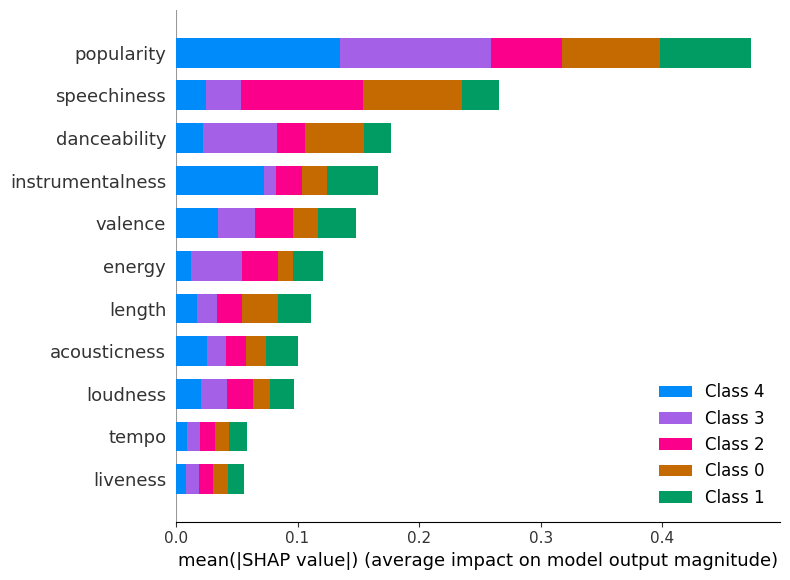

In [74]:
import shap
#shap.initjs()
explainer = shap.TreeExplainer(rf_final)
columns = list(df_upsampled.columns[1:])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=columns)